In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset
df = pd.read_csv("wine.csv")


In [5]:
# TASK 1: EXPLORATORY DATA ANALYSIS (EDA)
print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

Basic Statistics:
             Type     Alcohol       Malic         Ash  Alcalinity   

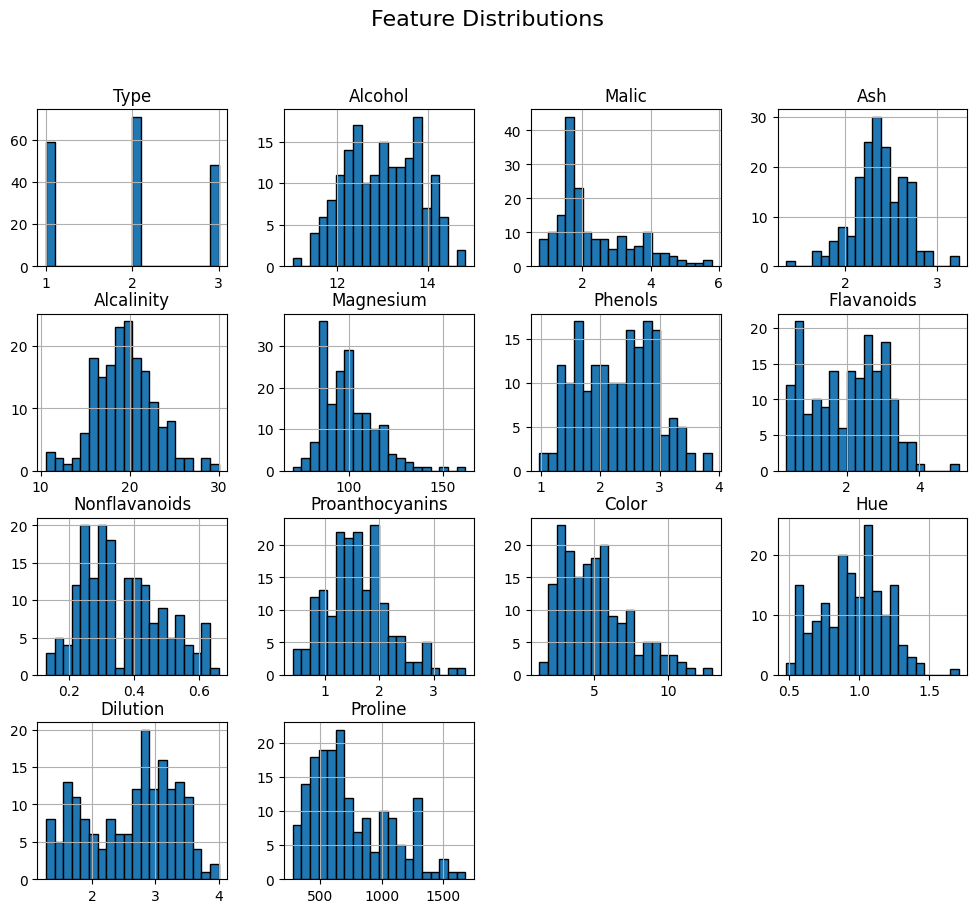

In [6]:
# Histograms
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


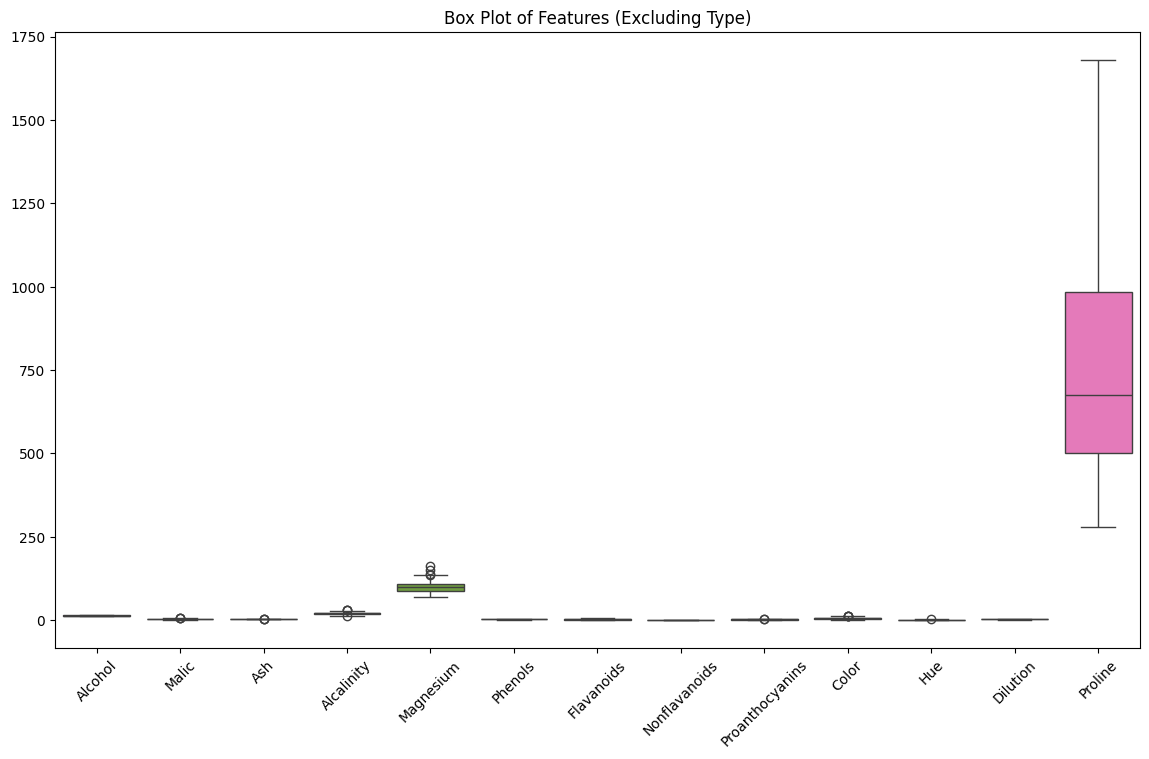

In [7]:
# Box Plots (Detect Outliers)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df.drop(columns=["Type"]))
plt.xticks(rotation=45)
plt.title("Box Plot of Features (Excluding Type)")
plt.show()

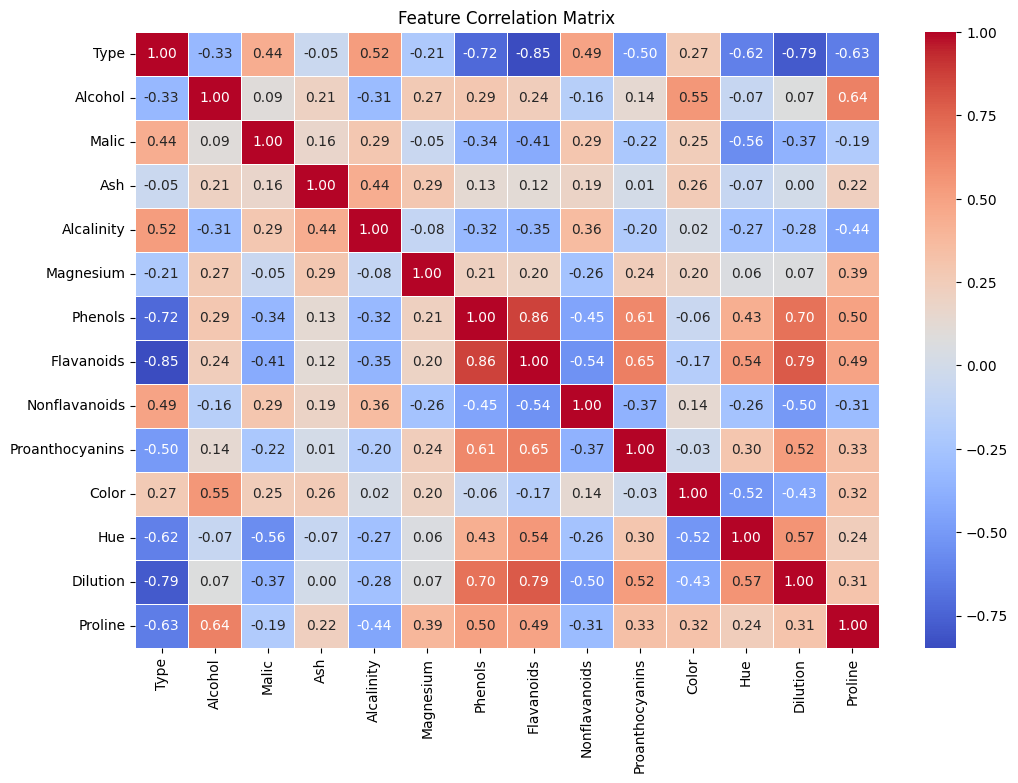

In [8]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


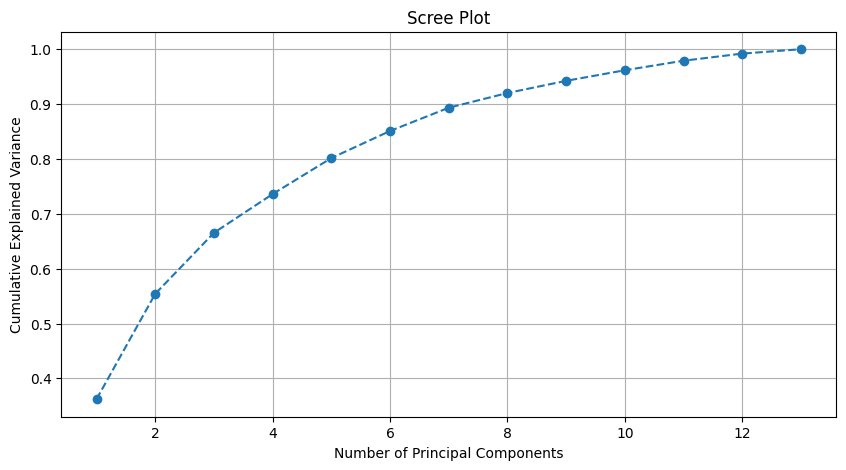


Optimal Number of Components: 10


In [9]:
#  TASK 2: DIMENSIONALITY REDUCTION WITH PCA
# Separate features and target variable
X = df.drop(columns=["Type"])
y = df["Type"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Scree Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.show()

# Choosing number of components (e.g., 95% variance)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"\nOptimal Number of Components: {n_components}")

# Transform the dataset
pca = PCA(n_components=n_components)
X_pca_transformed = pca.fit_transform(X_scaled)


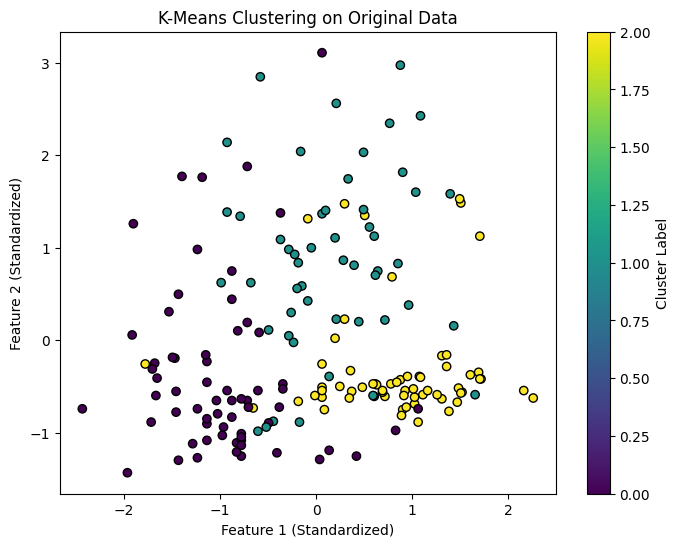


Original Data - Silhouette Score: 0.2849
Original Data - Davies-Bouldin Index: 1.3892


In [10]:
#  TASK 3: CLUSTERING WITH ORIGINAL DATA
# Apply K-Means on original data
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(X_scaled)

# Visualize Clustering (Original Data)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_original, cmap="viridis", edgecolor="k")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("K-Means Clustering on Original Data")
plt.colorbar(label="Cluster Label")
plt.show()

# Clustering Performance
sil_original = silhouette_score(X_scaled, clusters_original)
db_original = davies_bouldin_score(X_scaled, clusters_original)

print(f"\nOriginal Data - Silhouette Score: {sil_original:.4f}")
print(f"Original Data - Davies-Bouldin Index: {db_original:.4f}")


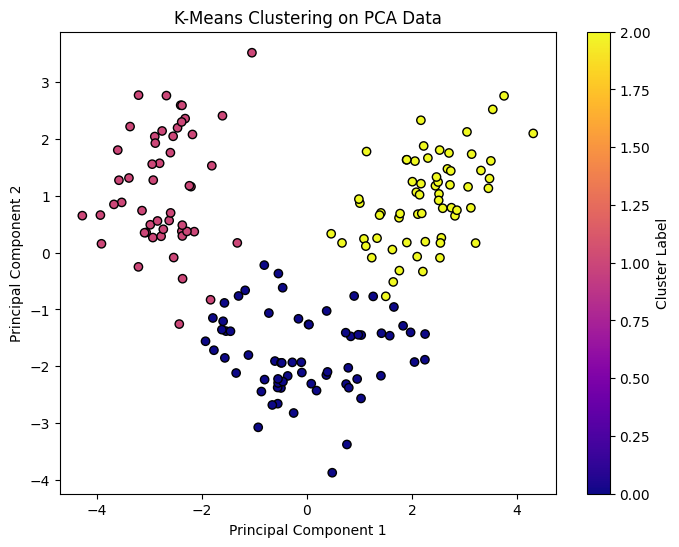


PCA Data - Silhouette Score: 0.2987
PCA Data - Davies-Bouldin Index: 1.3363


In [12]:
#  TASK 4: CLUSTERING WITH PCA DATA
# Apply K-Means on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca_transformed)

# Visualize Clustering (PCA Data)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_transformed[:, 0], X_pca_transformed[:, 1], c=clusters_pca, cmap="plasma", edgecolor="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA Data")
plt.colorbar(label="Cluster Label")
plt.show()

# Clustering Performance
sil_pca = silhouette_score(X_pca_transformed, clusters_pca)
db_pca = davies_bouldin_score(X_pca_transformed, clusters_pca)

print(f"\nPCA Data - Silhouette Score: {sil_pca:.4f}")
print(f"PCA Data - Davies-Bouldin Index: {db_pca:.4f}")



In [13]:
# TASK 5: COMPARISON AND ANALYSIS
print("\nComparison of Clustering Performance:")
print(f"Silhouette Score - Original Data: {sil_original:.4f}, PCA Data: {sil_pca:.4f}")
print(f"Davies-Bouldin Index - Original Data: {db_original:.4f}, PCA Data: {db_pca:.4f}")

if sil_pca > sil_original:
    print("\nPCA clustering resulted in better-defined clusters.")
else:
    print("\nOriginal data clustering performed better.")

print("\nTrade-offs: PCA reduces dimensionality, removes noise, and improves interpretability, but may lead to loss of some information.")



Comparison of Clustering Performance:
Silhouette Score - Original Data: 0.2849, PCA Data: 0.2987
Davies-Bouldin Index - Original Data: 1.3892, PCA Data: 1.3363

PCA clustering resulted in better-defined clusters.

Trade-offs: PCA reduces dimensionality, removes noise, and improves interpretability, but may lead to loss of some information.


In [14]:
# TASK 6: CONCLUSION AND INSIGHTS
print("\nFinal Insights:")
print("1. PCA effectively reduced dimensionality while preserving most variance.")
print("2. Clustering performance varied based on original vs PCA data.")
print("3. PCA can improve clustering when data has redundant features.")
print("4. Use PCA when computational efficiency and noise reduction are important.")
print("5. Direct clustering on original data may be preferable when feature interpretability is crucial.")



Final Insights:
1. PCA effectively reduced dimensionality while preserving most variance.
2. Clustering performance varied based on original vs PCA data.
3. PCA can improve clustering when data has redundant features.
4. Use PCA when computational efficiency and noise reduction are important.
5. Direct clustering on original data may be preferable when feature interpretability is crucial.
